In [1]:
import pandas as pd
import numpy as np
import tsfel
import os

In [2]:
cfg_file = tsfel.get_features_by_domain()

In [3]:
feat_dict_updated  = {'Spectral': { 'LPCC': {'complexity': 'log',
   'description': 'Computes the linear prediction cepstral coefficients.',
   'function': 'tsfel.lpcc',
   'parameters': {'n_coeff': 2},
   'use': 'yes'},
  'MFCC': {'complexity': 'constant',
   'description': 'Computes the MEL cepstral coefficients.',
   'function': 'tsfel.mfcc',
   'parameters': {'cep_lifter': 22,
    'fs': 100,
    'nfft': 512,
    'nfilt': 40,
    'num_ceps': 1,
    'pre_emphasis': 0.97},
   'use': 'yes'},
    'Spectral slope': {'complexity': 'log',
   'description': 'Computes the spectral slope, obtained by linear regression of the spectral amplitude.',
   'function': 'tsfel.spectral_slope',
   'parameters': {'fs': 100},
   'use': 'yes'},
    
    'Histogram': {'complexity': 'log',
   'description': 'Computes histogram of the signal.',
   'function': 'tsfel.hist',
   'parameters': {'nbins': 2, 'r': 1},
   'use': 'yes'},
    'Slope': {'complexity': 'log',
   'description': 'Computes the slope of the signal by fitting a linear equation to the observed data.',
   'function': 'tsfel.slope',
   'parameters': '',
   'use': 'yes'},
    'Zero crossing rate': {'complexity': 'constant',
   'description': 'Computes Zero-crossing rate of the signal.',
   'function': 'tsfel.zero_cross',
   'parameters': '',
   'use': 'yes'}
}
}

In [4]:
DataFrame= pd.read_csv('EMG-data.csv')
DF = DataFrame[DataFrame.label==1].copy()

In [5]:
DF.rename(columns={'class':'group'}, inplace=True) #changing the name of class column to group.inplace keyword makes the change permanent.
DF= DF[DF.group == 2]
DF

time  channel1  channel2  channel3  channel4  channel5  channel6  \
6424    6662  -0.00011  -0.00002  -0.00007  -0.00008  -0.00016  -0.00018   
6425    6663   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
6426    6664   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
6427    6665   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
6428    6666   0.00014   0.00001   0.00021   0.00016   0.00012  -0.00025   
...      ...       ...       ...       ...       ...       ...       ...   
98401  36873  -0.00005   0.00001  -0.00002  -0.00007  -0.00009   0.00001   
98402  36874  -0.00005   0.00001  -0.00002  -0.00007  -0.00009   0.00001   
98403  36875  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016   
98404  36876  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016   
98405  36877  -0.00006  -0.00006   0.00002   0.00000   0.00000  -0.00016   

       channel7  channel8  group  label  
6424   -0.00036  -0.00001      2      1  
6425   -0.00021   0.00006      2      1  
6426   -0.00021   0.00006      2      1  
6427   -0.00021   0.00006      2      1  
6428   -0.00021   0.00006      2      1  
...         ...       ...    ...    ...  
98401  -0.00015  -0.00009      2      1  
98402  -0.00015  -0.00009      2      1  
98403  -0.00007  -0.00003      2      1  
98404  -0.00007  -0.00003      2      1  
98405  -0.00007  -0.00003      2      1  

[6806 rows x 11 columns]

In [6]:
DF = DF[['channel1']].copy() 
DF

channel1
6424   -0.00011
6425    0.00014
6426    0.00014
6427    0.00014
6428    0.00014
...         ...
98401  -0.00005
98402  -0.00005
98403  -0.00006
98404  -0.00006
98405  -0.00006

[6806 rows x 1 columns]

In [7]:
module_path = os.path.join(os.getcwd(),'features.py') #os.getcwd() gives the current working directory 
Features = tsfel.time_series_features_extractor(feat_dict_updated, DF, fs=1000, window_spliter=True, window_size = 50, features_path= module_path)


*** Feature extraction started ***



*** Feature extraction finished ***


In [8]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0_Histogram_0         136 non-null    float64
 1   0_Histogram_1         136 non-null    float64
 2   0_LPCC_0              136 non-null    float64
 3   0_LPCC_1              136 non-null    float64
 4   0_MFCC_0              136 non-null    float64
 5   0_Slope               136 non-null    float64
 6   0_Spectral slope      136 non-null    float64
 7   0_Zero crossing rate  136 non-null    float64
dtypes: float64(8)
memory usage: 8.6 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51e3b14650>,
      dtype=object)

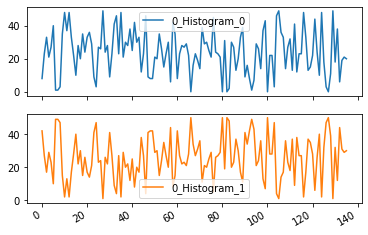

In [9]:
Features.plot(y=['0_Histogram_0', '0_Histogram_1'], subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d25c7c50>],
      dtype=object)

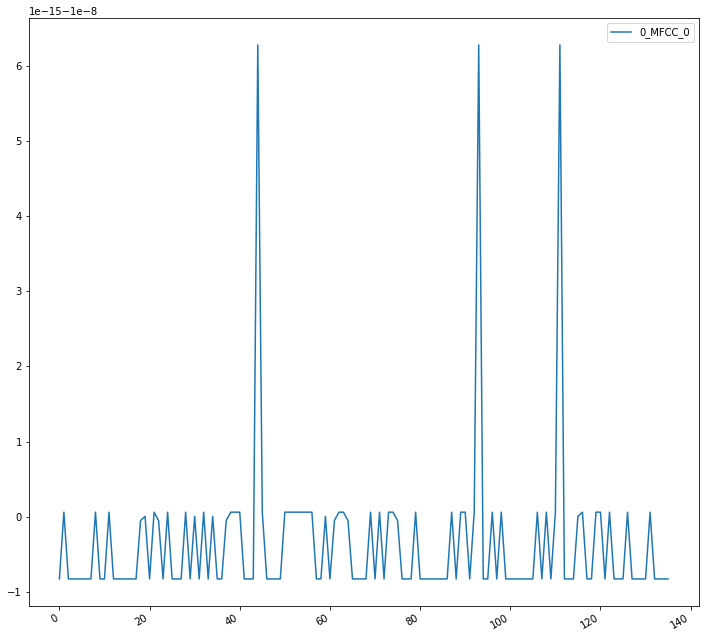

In [10]:
Features.plot(y=['0_MFCC_0'], subplots= True ,figsize=(12,12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51e3b140d0>,
      dtype=object)

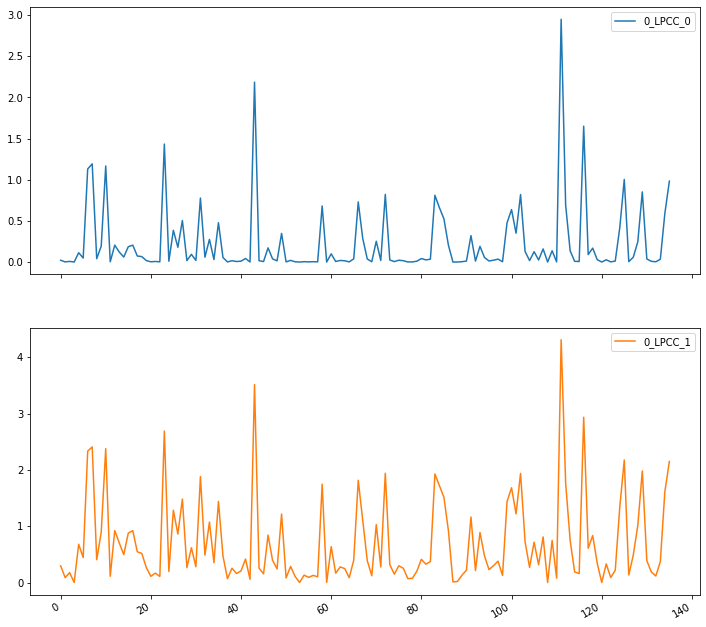

In [11]:
Features.plot(y=['0_LPCC_0', '0_LPCC_1'], subplots=True, figsize=(12,12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51d25d8b50>,
      dtype=object)

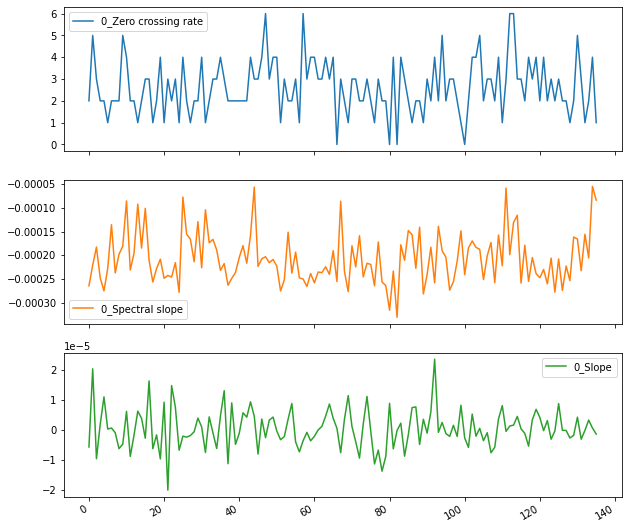

In [12]:
Features.plot(y=['0_Zero crossing rate', '0_Spectral slope', '0_Slope'], subplots=  True, figsize = (10,10) )